## 목적 : MODIS CTH HDF4 파일 읽고, 그림을 그려본다.

- 필요한 라이브러리 불러오기

In [1]:
import matplotlib.pyplot as plt          # 그림 그리기 라이브러리
from mpl_toolkits.basemap import Basemap # 지도 그리기 라이브러리
from pyhdf.SD import SD, SDC             # hdf4 라이브러리
import numpy as np

 - 함수 정의

In [2]:
def plot_modis_cth(fname, 
                   llcrnrlat, 
                   llcrnrlon, 
                   urcrnrlat,
                   urcrnrlon,
                   output):
    
    f = SD('/storage1/jhlee/NMSC_2018/MOD06_L2/' + fname, SDC.READ)
    lat = f.select('Latitude')[:]
    lon = f.select('Longitude')[:]
    cth = f.select('Cloud_Top_Height')[:] * 0.001 # 단위 변환 (m -> km)
    
    cth = np.where(cth == -32.767, np.nan, cth)
    
    plt.figure(figsize = (6,6))
    
    m = Basemap(projection='cyl', 
                llcrnrlon = llcrnrlon,
                llcrnrlat = llcrnrlat,
                urcrnrlon = urcrnrlon,
                urcrnrlat = urcrnrlat,
                resolution = 'i')
    
    m.drawcoastlines()
    m.drawparallels(np.arange(llcrnrlat, urcrnrlat + 1, 5), labels = [1,0,0,0])
    m.drawmeridians(np.arange(llcrnrlon, urcrnrlon + 1, 5), labels = [0,0,0,1])
    m.drawmapboundary(fill_color='white')
    
    # lon, lat -> x, y
    x, y = m(lon, lat)
    
    
    # MODIS Granule 경계선 그리기
    m.plot(x[0], y[0], 'k')        # bottom
    m.plot(x[:,0], y[:,0], 'k')    # right
    m.plot(x[:,-1], y[:,-1], 'k')  # left
    m.plot(x[-1], y[-1], 'k')      # top
    
    
    # MODIS CTH 그리기
    m.pcolormesh(x, y, cth, cmap='jet')
  

    # colorbar 및 범위 설정
    m.colorbar(label = 'Cloud Top Height [km]')
    plt.clim(0,20)
  

    # 그림 제목
    plt.title('MODIS Cloud top height')

    
    # 그림 저장
    plt.savefig('../figure/MODIS/' + output, 
                bbox_inches = 'tight',
                pad_inches = 0,
                dpi = 300)

- 함수 입력값 정의

In [3]:
fname = 'MYD06_L2.A2017307.0510.061.2018011035049.hdf'
llcrnrlat = 15 #20.
llcrnrlon = 105 #110.
urcrnrlat = 45 #40.
urcrnrlon = 135 #130.
output = 'MYD06_201711030510.png'

 - 그림 그리기

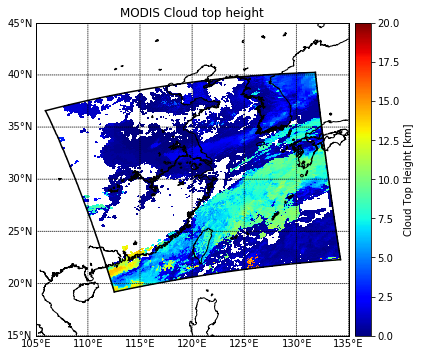

In [4]:
plot_modis_cth(fname, 
               llcrnrlat, 
               llcrnrlon, 
               urcrnrlat,
               urcrnrlon,
               output)